# Final Project

# SOLUTIONS

# Getting the Data

## 🥊 Challenge: Find the Data

Use `os.listdir()` to see the files in the "chis_data" folder, which is in the "data" folder, which is in the main "Python-Fundamentals" folder. Using Pandas' `read_csv()` method, read in all three data frames and assign them to the three variables defined below.

💡 **Tip**: Remember how to move up in the folder structure? `../../` goes up two folders!

💡 **Tip**: You can use Jupyter Lab's File Browser to the left of your screen to get a sense of where the "chis_data" folder is.

In [37]:
# YOUR CODE HERE
import pandas as pd
df_eng = pd.read_csv('../../data/chis_data/chis_eng.csv')
df_esp = pd.read_csv('../../data/chis_data/chis_esp.csv')
df_other = pd.read_csv('../../data/chis_data/chis_other.csv')

## 🥊 Challenge: Concatenate

Look up the [documentation for Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html), and see if you can find a function that **concatenates** the three DataFrames we have now. Save the concatenated list in a new variable called `df`.

In [34]:
# YOUR CODE HERE
df = pd.concat([df_eng,df_esp,df_other])


🔔 **Question**: Let's take a look at the final data frame.

1. How many rows and columns are there in the total dataframe?
2. How many numeric columns are there in the dataset?
3. Which columns look interesting to you?

In [35]:
# YOUR CODE HERE
print(df.shape)
df.head()

(22160, 8)


,general_health,overweight,fruit_perweek,veg_perweek,feel_left_out,poverty_level,household_tenure,interview_language
0,EXCELLENT,NO,3,0,INAPPLICABLE,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH
1,VERY GOOD,NO,4,2,SOME OF THE TIME,300% FPL AND ABOVE,OWN,ENGLISH
2,VERY GOOD,NO,21,20,INAPPLICABLE,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,ENGLISH
3,GOOD,YES,7,4,HARDLY EVER,100-199% FPL,OWN,ENGLISH
4,GOOD,YES,6,6,INAPPLICABLE,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH


# Exploratory Data Analysis (EDA)

## 🥊 Challenge: Data Cleaning 

Often, we will want to remove some missing values in a data frame. Have a look at the `general_health` column and find the missing values using the `.isna()` method. Then, use `.sum()` to sum the amount of undefined (NaN) values.

In [4]:
df['general_health'].isna().sum()

885

Get rid of the non-existent values in this column with the `.dropna()` method. Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to see how to do this.

💡 **Tip**: Use the `subset` argument to select a specific column to remove values from. 

In [5]:
# YOUR CODE HERE
df = df.dropna(subset=['general_health'])

## 🥊 Challenge: Counting Values

Now let's do some Exploratory Data Analysis. One thing we will want to do is count values of interesting features. Run `value_counts()` on the `feel_left_out` column and normalize the output.


In [6]:
# YOUR CODE HERE
df['feel_left_out'].value_counts(normalize=True)


INAPPLICABLE        0.618801
HARDLY EVER         0.297626
SOME OF THE TIME    0.071492
OFTEN               0.011704
PROXY SKIPPED       0.000376
Name: feel_left_out, dtype: float64

## 🥊 Challenge: Quantiles

We can use the `quantile()` method to calculate the q-th quantile of the data along a specified axis. Try to find the amount of fruits eaten by the top 1% of respondents.

In [7]:
# YOUR CODE HERE

df['fruit_perweek'].quantile(0.99)

28.0

## 🥊 Challenge: Cross-tabulate
We can use the `crosstab()` method to cross-tabulate poverty level and health. 

In [8]:
pd.crosstab(index=df['poverty_level'], columns=df['general_health'])

general_health,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD
poverty_level,,,,,
0-99% FPL,223,389,632,145,461
100-199% FPL,323,540,931,164,757
200-299% FPL,361,377,926,85,941
300% FPL AND ABOVE,3106,1018,3781,209,5906


Look at the crosstab [documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) and look for aruments that allow you to get the normalized values, and include subtotals.

Get the cross tab of `poverty_level` and `general_health`. Normalize them and print the subtotals. 

In [9]:
# YOUR CODE HERE

pd.crosstab(index=df['poverty_level'], columns=df['general_health'],
            normalize='index',margins=True)


general_health,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD
poverty_level,,,,,
0-99% FPL,0.120541,0.210270,0.341622,0.078378,0.249189
100-199% FPL,0.118969,0.198895,0.342910,0.060405,0.278821
200-299% FPL,0.134201,0.140149,0.344238,0.031599,0.349814
300% FPL AND ABOVE,0.221541,0.072611,0.269686,0.014907,0.421255
All,0.188625,0.109236,0.294712,0.028343,0.379083


## 🥊 Challenge: Grouping

Use `groupby()` to get the **means** of the amount of veggies eaten per week (`veg_perweek`) when grouping by `general_health`. Sort the mean from small to large.

In [10]:
# YOUR CODE HERE
df['veg_perweek'].groupby(df['general_health']).mean().sort_values()


general_health
FAIR         5.851979
POOR         5.961857
GOOD         6.092663
VERY GOOD    6.521389
EXCELLENT    7.136805
Name: veg_perweek, dtype: float64

## 🥊 Challenge: Visualizing Correlations

Let's try to find out if there's a correspondence between `fruit_perweek` and `veg_perweek`.

Getting the correlations between features is done using `.corr()`. Look up how it works and try it out!

In [11]:
# YOUR CODE HERE
df.fruit_perweek.corr(df.veg_perweek)

0.7649229096204797

Use Pandas' `.plot()` method to visualize the correlation with a scatterplot.

💡 **Tip**: Use the argument `type=scatter` to get a scatterplot.

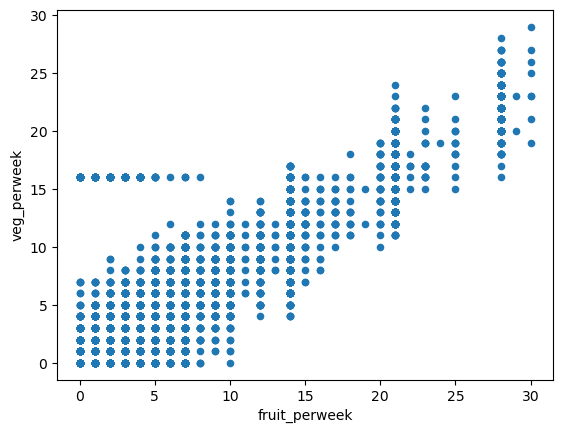

In [12]:
# YOUR CODE HERE
df.plot(kind='scatter', x='fruit_perweek', y='veg_perweek');
